<a href="https://colab.research.google.com/github/megha-66/Deep-Learning-Lab-works-/blob/main/DL_Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

#Define vocalbulary and encode sequences
vocab = ['d','e','p','<stop>']
vocab_size = len(vocab)
char_to_idx = {ch : i for i,ch in enumerate(vocab)}
idx_to_char = {i:ch for i,ch in enumerate(vocab)}

# Sample dataset
data = ['d', 'e', 'p', 'd', 'e', 'p', 'd', 'e', '<stop>']

# Create input-output pairs
sequences = []
next_chars = []
seq_length = 3  # length of input sequence

for i in range(len(data) - seq_length):
    sequences.append(data[i:i+seq_length])
    next_chars.append(data[i+seq_length])

# Convert sequences and outputs to integer indices
X = np.array([[char_to_idx[char] for char in seq] for seq in sequences])
y = np.array([char_to_idx[char] for char in next_chars])

# One-hot encode the outputs (for categorical cross-entropy)
y = to_categorical(y, num_classes=vocab_size)

# Model Architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=seq_length))
model.add(SimpleRNN(units=16, return_sequences=False))
model.add(Dense(units=vocab_size, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=100, verbose=2)





Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 1.4061
Epoch 2/100
1/1 - 0s - 24ms/step - accuracy: 0.0000e+00 - loss: 1.3974
Epoch 3/100
1/1 - 0s - 55ms/step - accuracy: 0.3333 - loss: 1.3889
Epoch 4/100
1/1 - 0s - 59ms/step - accuracy: 0.3333 - loss: 1.3805
Epoch 5/100
1/1 - 0s - 31ms/step - accuracy: 0.6667 - loss: 1.3723
Epoch 6/100
1/1 - 0s - 26ms/step - accuracy: 0.6667 - loss: 1.3641
Epoch 7/100
1/1 - 0s - 59ms/step - accuracy: 0.6667 - loss: 1.3559
Epoch 8/100
1/1 - 0s - 60ms/step - accuracy: 0.6667 - loss: 1.3478
Epoch 9/100
1/1 - 0s - 59ms/step - accuracy: 0.6667 - loss: 1.3397
Epoch 10/100
1/1 - 0s - 25ms/step - accuracy: 0.6667 - loss: 1.3316
Epoch 11/100
1/1 - 0s - 58ms/step - accuracy: 0.6667 - loss: 1.3234
Epoch 12/100
1/1 - 0s - 24ms/step - accuracy: 0.6667 - loss: 1.3152
Epoch 13/100
1/1 - 0s - 26ms/step - accuracy: 0.6667 - loss: 1.3069
Epoch 14/100
1/1 - 0s - 59ms/step - accuracy: 0.6667 - loss: 1.2985
Epoch 15/100
1/1 - 0s - 59ms/step - accuracy: 0.6667 - loss: 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


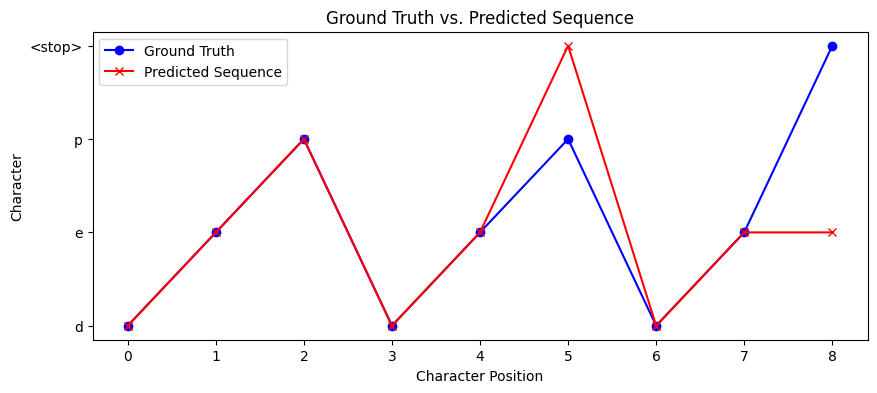

Ground Truth: ['d', 'e', 'p', 'd', 'e', 'p', 'd', 'e', '<stop>']
Predicted Sequence: ['d', 'e', 'p', 'd', 'e', '<stop>', 'd', 'e', 'e']


In [4]:
# Function to generate a sequence of predictions
def generate_sequence(model, seed_sequence, num_chars, char_to_idx, idx_to_char):
    generated_sequence = seed_sequence.copy()

    # Predict 'num_chars' characters after the seed
    for _ in range(num_chars):
        # Predict the next character
        next_char = predict_next_char(model, generated_sequence[-3:], char_to_idx, idx_to_char)
        # Append the predicted character to the sequence
        generated_sequence.append(next_char)

    return generated_sequence

# Ground truth sequence for comparison
ground_truth = ['d', 'e', 'p', 'd', 'e', 'p', 'd', 'e', '<stop>']

# Seed sequence for generating predictions
seed_sequence = ['d', 'e', 'p']

# Generate a sequence of predictions from the model
num_chars_to_generate = len(ground_truth) - len(seed_sequence)
predicted_sequence = generate_sequence(model, seed_sequence, num_chars_to_generate, char_to_idx, idx_to_char)

# Plotting the ground truth vs. predicted sequence
plt.figure(figsize=(10, 4))

# Ground truth plot
plt.plot(range(len(ground_truth)), ground_truth, 'o-', label='Ground Truth', color='blue')

# Predicted sequence plot
plt.plot(range(len(predicted_sequence)), predicted_sequence, 'x-', label='Predicted Sequence', color='red')

plt.title('Ground Truth vs. Predicted Sequence')
plt.xlabel('Character Position')
plt.ylabel('Character')
plt.legend()
plt.show()

# Print the generated sequence for inspection
print(f"Ground Truth: {ground_truth}")
print(f"Predicted Sequence: {predicted_sequence}")
